### Submission guidelines

1. Fill in your name in the notebook in the top cell.
2. Fill in the gaps in the code where indicated. <br> Make sure that you:<br> - fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" <br> - **do not leave any `raise NotImplementedErrors`** in the code
3. Do **NOT change the variable names**, however, you can add comments in the code.
4. Do **NOT remove any of the cells** of the notebook!
5. Discussion is allowed, but every student needs to hand a personal version of the lab. Plagiarism will be sanctioned!   
6. Before submitting, restart your kernel & **make sure that every cell runs**.<br>Code that doesn't run will not be scored.<br>The notebooks with all source code, and optional extra files need to be handed in using Ufora.<br> Make sure all your notebooks are already executed when you upload them (i.e. there should be output after the cells). 
7. **Zip** your lab assignment folder and name the archive: `Surname_Name.zip` <br> Keep the same folder structure as the provided lab assignment!<br><span style='color: red'>Do not rename any of the notebooks or files</span>!<br>



In [1]:
NAME = "Cesar Zapata"


Final tip: make sure you have answered every question and filled in all the required code by running through the notebook and searching for *YOUR ANSWER HERE* and *YOUR CODE HERE*!

Good luck!

---

## Part 1: Linear Regression

> Classification predicts only nominal values for the target variable. With regression analysis the value of a continuous target variable $y$ can be predicted by means of one or more input variables $x$. The most common and most basic form of regression analysis is **linear regression** analysis. The goal of this lab is to become acquainted with linear regression analysis applied with Python.
You will be using stochastic gradient descent to optimize a linear regression model. This has been discussed in the lecture.

The following topics will be covered in this lab:
- Implementing a (univariate) linear regression model with the gradient descent algorithm
- Testing the linear regression on a toy dataset
- Apply univariate linear regression on a real dataset
- Apply multivariate linear regression on a real dataset

## Imports

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

# Exercise 1: Creating a (univariate) linear regression model

## Generate the data
We will generate some sample data here.  
X is the independent variable (input)  
y is the dependent variable (output)

In [2]:
y = np.array([ 19 , 20 , 20.5 , 21.5 , 22 , 23 , 23 , 25.5 , 24 , 25])
X = np.arange(0,len(y)).reshape((len(y),1))

## Plotting the data
Let's start by plotting the generated data:
- Create a scatter plot of the generated data


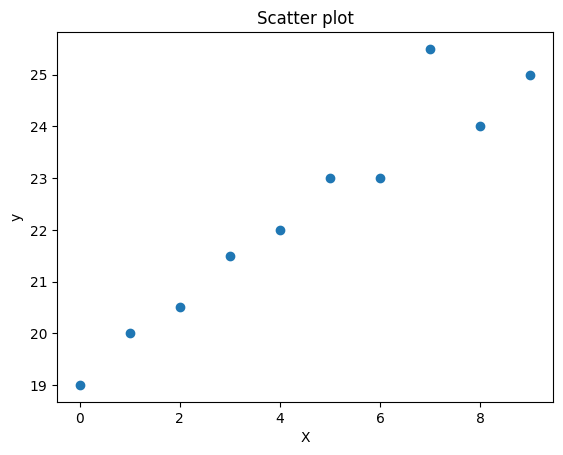

In [3]:
plt.scatter(X, y)
plt.title("Scatter plot")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

You should see on the plot that the generated data roughly forms a line. The objective of linear regression is to find the parameters ($\beta_0$ and $\beta_1$) of a line:
$$h(x) = \beta_0 + \beta_1 x$$
so that the line best fits our data. 

To find the best fitting line, we need a metric that measures how well our line fits the data. As you have seen in the lecture, we can use the **mean squared of errors** for this. We call this function, the **cost function** or **loss**:  
 >$J(\beta)=\frac{1}{m}\sum \limits_{i=1}^{m} (h(x^{(i)})-y^{(i)})^2$  
 
Where m is the number of datapoints, $x^{(i)}$ the $i^{th}$ input sample, $y^{(i)}$ the $i^{th}$ output sample and $h()$ is our model.
- Implement this cost function, try to avoid using a for loop (**hint: You can use numpy operations, such as [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) to make the dimensions of the X and y array match.**)

In [4]:
def cost_function(X, y, b0, b1):

    h = b0 + b1*X
    m = len(y)

    cost = 1/(m) * np.sum(((h - y[:, np.newaxis])**2))
    
    return cost

print(cost_function(X, y, 0, 0))
print(cost_function(X, y, 1, 1))
print(cost_function(X, y, -10, -10))

503.675
285.075
6924.675


In [5]:
"""Check that the mean_squared_errors method returns the correct output for several inputs"""
assert round(cost_function(X, y, 0, 0)) == 504
assert round(cost_function(X, y, 1, 1)) == 285
assert round(cost_function(X, y, -10, -10)) == 6925


Now that we have a cost function that can evaluate how well our model fit's the data, let's pretend you are the training algorithm. Use the *cost_function* method to find good values for $\beta_0$ and $\beta_1$ to achieve a cost (Mean Squared Error) lower than 1(**hint: look at the data you plotted above**). 

In [6]:
b0 = 19
b1 = 0.75

cost = cost_function(X, y, b0, b1)
print("b0:{}, b1:{} -> MSE: {}".format(b0, b1, cost))

b0:19, b1:0.75 -> MSE: 0.35625


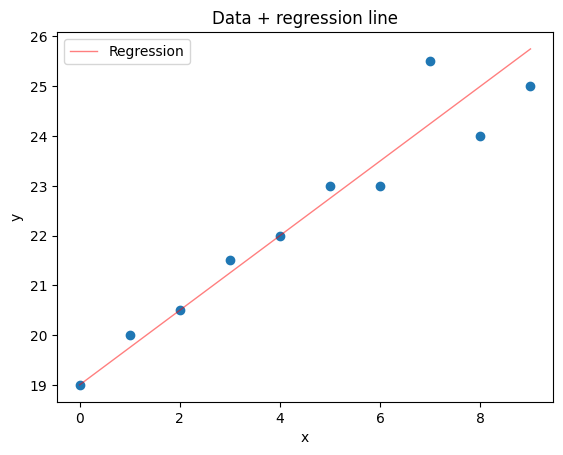

In [7]:
y_line = b0 + b1 * X
plt.scatter(X, y)
plt.plot(X, y_line, 'r', linewidth=1, alpha=0.5, label="Regression")
plt.title("Data + regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Now, instead of finding good values for $\beta_0$ and $\beta_1$ ourselves, we will implement an algorithm that will find the best values for us. Therefore, we will use the gradient descent algorithm as you've seen in the lecture.

## Quick recap of gradient descent
As you have seen in the lecture, gradient descent is an optimization algorithm that allows to find a **local minimum** of a function. In our case we want to find the minimum MSE for our linear regressor model. The cost function we want to minimize is $J(\beta)$ and the parameters we can change are $\beta_0$ and $\beta_1$. Remember that for linear regression the function we want to optimize has only one global minimum, which is very nice for gradient descent. The cost function with respect to the parameters $\beta_0$ and $\beta_1$ will be similar to the plot below.

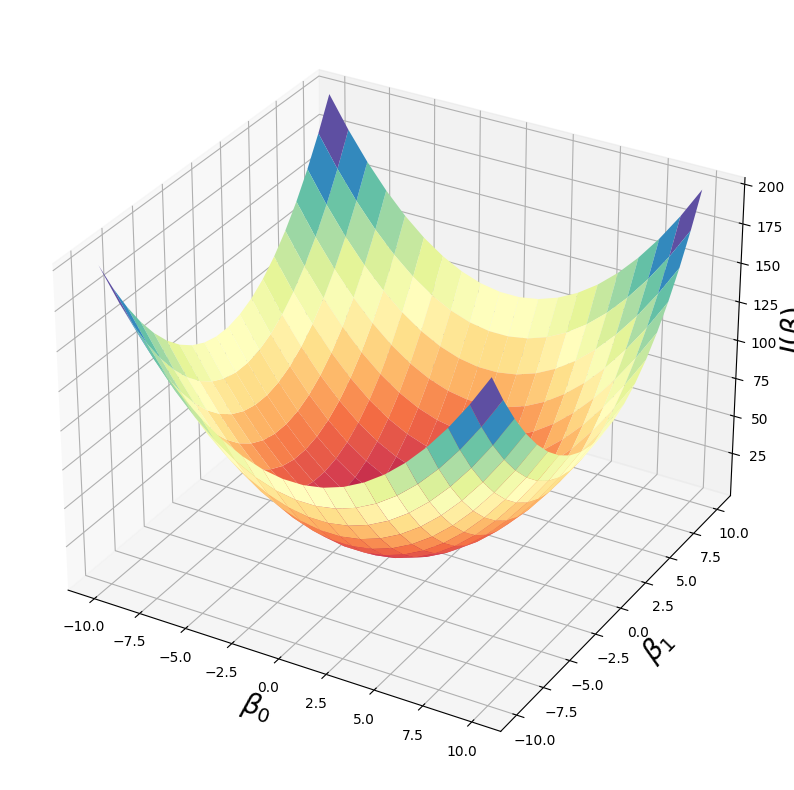

In [8]:
# Here is some code to make a simple 3D plot, pay attention to this code as you will have to plot 3D surfaces yourself afterwards.
from matplotlib import cm
resolution = 20 
xx, yy = np.meshgrid(np.linspace(-10, 10, num=resolution), np.linspace(-10, 10, num=resolution))
zz = (xx**2 + yy**2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy , zz, cmap=cm.Spectral)

ax.set_xlabel(r'$\beta_0$', size=20)
ax.set_ylabel(r'$\beta_1$', size=20)
ax.set_zlabel(r'$J(\beta)$', size=20)
plt.show()

With gradient descent we will update $\beta_0$ and $\beta_1$ in the direction of the descent. This will be repeated until a minimum is reached. Imagine a ball placed anywhere on the curve rolling down to the bottom, this is the path that the gradient descent algorithm will take.  
But how do we know in which direction the minimum is? We can use derivatives to calculate the slope at any point on he surface. As shown in the figure below, in order to reach the minimum we need to take steps proportional to the **negative** of the gradient. We use a parameter $\alpha$ (the learning rate) in order to control the step size.
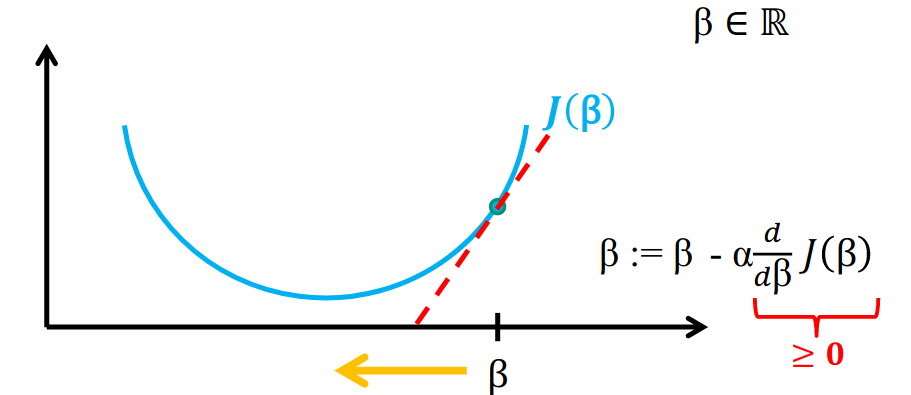

- If you want more information about gradient descent there are many great resources out there: 
    - https://en.wikipedia.org/wiki/Gradient_descent
    - StatQuest gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8
    - (In a neural network context, but is a great series to gain insight into neural networks) https://youtu.be/IHZwWFHWa-w?t=415

## Implementing gradient descent

Now we will implement a gradient descent update step.

### Step 1: Derive the partial derivative for all the the parameters, with respect to the cost function. We give you the formula's here:
> Cost function: $$J(\beta)=\frac{1}{m}\sum \limits_{i=1}^{m} ((\beta_0 + \beta_1 x^{(i)})-y^{(i)})^2$$  


$$
\begin{align} 
\frac{\delta J(\beta)}{\delta \beta_0} &= \frac{\delta}{\delta \beta_0} \frac{1}{m}\sum \limits_{i=1}^{m} ((\beta_0 + \beta_1 x^{(i)})-y^{(i)})^2 \\
&= \frac{1}{m}\sum \limits_{i=1}^{m} 2((\beta_0 + \beta_1 x^{(i)})-y^{(i)}) \frac{\delta}{\delta \beta_0}((\beta_0 + \beta_1 x^{(i)})-y^{(i)}) \\
&= \frac{1}{m}\sum \limits_{i=1}^{m} 2((\beta_0 + \beta_1 x^{(i)})-y^{(i)}) 
\end{align}
$$  


$$
\begin{align}
\frac{\delta J(\beta)}{\delta \beta_1} &=\frac{\delta}{\delta \beta_1} \frac{1}{m}\sum \limits_{i=1}^{m} ((\beta_0 + \beta_1 x^{(i)})-y^{(i)})^2 \\
&= \frac{1}{m}\sum \limits_{i=1}^{m} 2((\beta_0 + \beta_1 x^{(i)})-y^{(i)}) \frac{\delta}{\delta \beta_1}((\beta_0 + \beta_1 x^{(i)})-y^{(i)})\\
&= \frac{1}{m}\sum \limits_{i=1}^{m} 2x^{(i)}((\beta_0 + \beta_1 x^{(i)})-y^{(i)})
\end{align}
$$

### Step 2: Update the weights in the "direction" of the slope with a certain learning rate $\alpha$:
$$
\beta_j := \beta_j - \alpha \frac{\delta}{\delta \beta_j} J(\beta) \ \ (for\ j=0\ and\ j=1)
$$

> Implement a gradient descent step in the function underneath. Avoid using for loops.

In [9]:
def gradient_descent_step(X, y, b0, b1, learning_rate):

    m = len(X)
    h = b0 + X.T[0]*(b1)
    
    b02 = b0 - learning_rate * (1/m) * np.sum(2*(h - y)) 
    b12 = b1 - learning_rate * (1/m) * np.sum(2*X.T[0] * (h - y))     
    
    return b02, b12

In [10]:
"""Checking the gradient descent step method with some precomputed values."""
s = f"`gradient_descent_step` returns a wrong result, check your implementation!"

assert (np.round(gradient_descent_step(X, y, 1, 1, 0.001), decimals=3) == np.round((1.0337, 1.1464), decimals=3)).all(), s
assert (np.round(gradient_descent_step(X, y, 1, 1, 0.1), decimals=3) == np.round((4.370000000000001, 15.64), decimals=3)).all(), s
assert (np.round(gradient_descent_step(X, y, 19, 0.5, 0.1), decimals=3) == np.round((19.22, 1.79), decimals=3)).all(), s
assert (np.round(gradient_descent_step(X, y, -10, 0.5, 0.1), decimals=3) == np.round((-3.9799999999999995, 27.89), decimals=3)).all(), s

## Fitting a linear regressor on the data
Now we will use the method you implemented above in a custom gradient descent univariate regressor class. This class is implemented for you below.  
The **fit** method trains the model by calling the *gradient_descent_step method* a certain number of times (defined by the n_iter parameter). It also prints the MSE value every 50 iterations, so that you can see if your model trains correctly.  
The **predict** method, predicts the values of y based on the input and the trained parameters.

In [11]:
class customGDRegressor():
    def __init__(self, n_iter, learning_rate):
        self.n_iter = n_iter
        self.learning_rate = learning_rate

        # initialize b0 and b1
        self.b0 = 0
        self.b1 = 0
    
    def fit(self, X, y):
        for i in range(self.n_iter):         
            self.b0, self.b1 = gradient_descent_step(X, y, self.b0, self.b1, self.learning_rate)
            
            if (i % 50 == 0) or (i == (self.n_iter - 1)):
            # if (i == (self.n_iter - 1)):
                cost = cost_function(X, y, self.b0, self.b1)
                print("Iteration {}/{}, MSE : {}".format(i, self.n_iter, cost))   
            
    def predict(self, X):
        y_pred = self.b0 + self.b1 * X
        return y_pred

Let's now use our univariate regressor on the sample data. 
- Train the model above on our sample dataset, play around with the number of iterations and learning rate. 
- Try to achieve an MSE value **lower than 0.5**. 
- Store the obtained values for b0 and b1 in **variables called b0 and b1 respectively** and print those.

In [12]:
# Model = customGDRegressor(200000, 0.001) # b0 = 19.281818..., b1 = 0.68181818..., MSE = 0.31727272...
# Model.fit(X, y)
# b0, b1 = Model.b0, Model.b1
# print(f"\nb0: {b0}\nb1: {b1}")

Model = customGDRegressor(200, 0.03)
Model.fit(X, y)
b0, b1 = Model.b0, Model.b1
print(f"\nb0: {b0}\nb1: {b1}")

Iteration 0/200, MSE : 326.18939300000005
Iteration 50/200, MSE : 18.033302806040684
Iteration 100/200, MSE : 3.5256722291956595
Iteration 150/200, MSE : 0.8983186680526511
Iteration 199/200, MSE : 0.4261592332703512

b0: 18.668580091124646
b1: 0.7796141622876577


In [13]:
assert b0, "b0 is 0, are you sure you stored the model parameter to a variable called b0?"
assert b1, "b1 is 0, are you sure you stored the model parameter to a variable called b1?"

## Plot the data

> Create a scatter plot of the data (X,y)

> Plot the line you have just fitted.

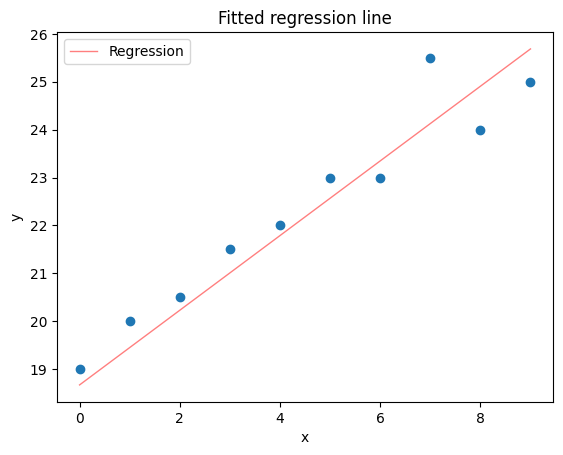

In [14]:
y_line = b0 + b1 * X
plt.scatter(X, y)
plt.plot(X, y_line, 'r', linewidth=1, alpha=0.5, label="Regression")
plt.title("Fitted regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Question: Can the MSE value reach 0 in this example, what determines the lowest MSE value we can achieve?**

To get a value of 0, the learning rate must be an extremely small number, with a really high number of iterations. However, this can only be possible if the data itself is linear (the distribution follows a line perfectly). In this case, the data is not completely linear but it gets close, and giving it a try with 200.000 iterations and a learning rate of 0.001, the value achieved for the MSE is 0.31727272..., from which we can conclude that the maximum value for the MSE with the linearity of this data is 0.317272..

As the idea was to get a value for MSE lower than 0.5, a fast way to do it was with only 200 iterations and a learning rate of 0.03

# Exercise 2: Linear regression on real data

> So far, no forecasting has been done. The regression line was fitted and evaluated on the same data. In this exercise, the data will be divided into training data and test data. The model wil be fitted on the test data and it's performance evaluated on the test data. This ensures that the measured performance of the model is representative for new unseen data.

> In this exercise, you will work with the California Housing dataset, where the objective is to estimate the house value for California districts.


## Data prepration
### Data exploration

In [68]:
from sklearn.datasets import load_diabetes, fetch_california_housing

In [69]:
housing_data = fetch_california_housing(return_X_y=False)
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [70]:
# Target values
print(housing_data.target.shape)
housing_data.target

(20640,)


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [71]:
# The features
print(housing_data.data.shape)
housing_data.data

(20640, 8)


array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [72]:
# The feature names
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

The data we loaded is not contained in a nice dataframe as we are used to, start by making a dataframe from the boston dataset and show the **first 10 rows** of the data. Don't forget to include the target data (Median House Value) into your dataframe, name this column **MHV**. (**Hint: You can use [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) to concat numpy arrays**)

In [73]:
df = pd.DataFrame()
df.keys = housing_data.feature_names

for i, k in enumerate(df.keys):
    df[k] = housing_data.data[:, i]

df["MHV"] = housing_data.target
df.keys.append('MHV')
df.head(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**Question: What is the range of the age column (minimum and maximum)?**

In [74]:
min_age = min(df['HouseAge'])
max_age = max(df['HouseAge'])

In [75]:
print(f"Min age: {min_age}")
print(f"Max age: {max_age}")

Min age: 1.0
Max age: 52.0


**Question: Do any of the features or target variable have NULL values?**

In [76]:
df.isnull().values.any()

False

**Question: Make a summary of the dataset: min, max, mean, std,... per column.**

In [77]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Question: Make a boxplot for the different columns, the Y-axis should be logarithmic**
 - Tip: Matplotlib has already been imported.

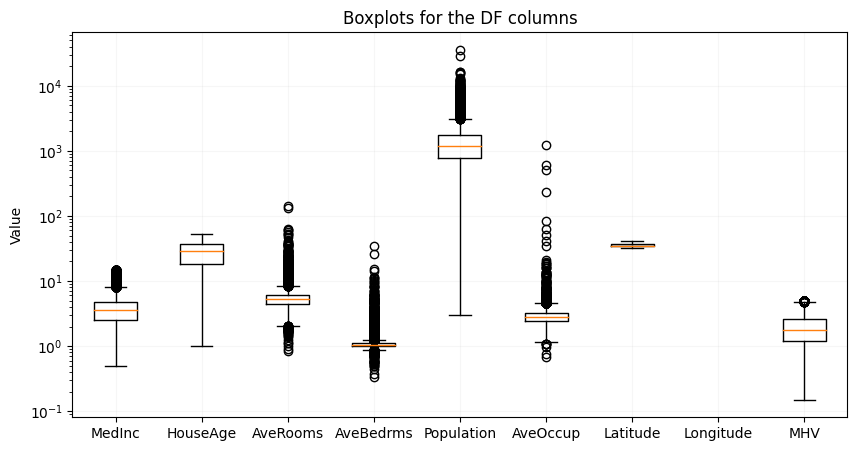

In [85]:
fig = plt.figure(figsize=(10,5))

plt.boxplot(df.values, labels=df.keys)
plt.yscale('log')
plt.ylabel('Value')
plt.grid(alpha=0.1)
plt.title('Boxplots for the DF columns')
plt.show()

**Question: Explore the dataset by making scatter plots of some features with respect to the target value. Plot at least the following pairs:**
- Median Income - MHV
- Population - MHV

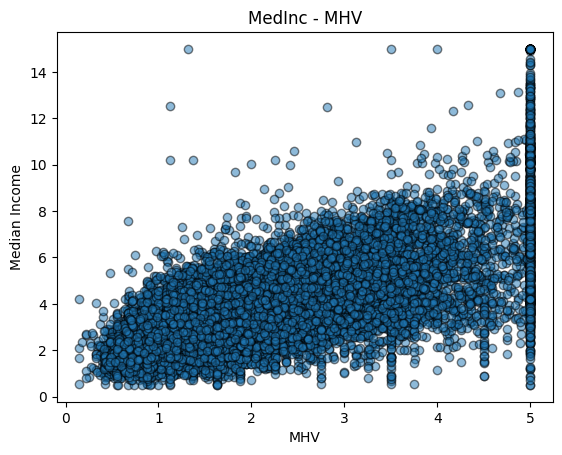

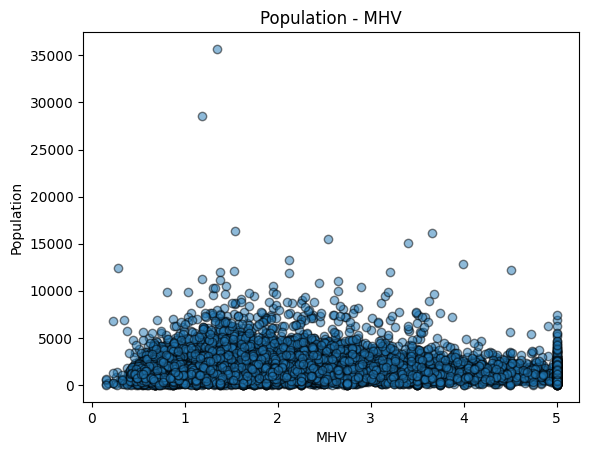

In [88]:
plt.scatter(df['MHV'], df['MedInc'], alpha=0.5, edgecolors='k')
plt.ylabel("Median Income")
plt.xlabel('MHV')
plt.title("MedInc - MHV")
plt.show()

plt.scatter(df['MHV'], df['Population'], alpha=0.5, edgecolors='k')
plt.ylabel('Population')
plt.xlabel('MHV')
plt.title("Population - MHV")
plt.show()

### Correlation between features, and target value

>The Pearson Correlation is a measure of the linear dependence (correlation) between two variables. The result is a value between +1 and -1 inclusive. It can be used to examine the linear dependence of a target variable $y$ and the input variable $X$ in order to determine the suitability of input data to be used for linear models.

**Question:**
 - **Calculate the pearson correlation between the different features and the target variable**
 - **Plot the correlation matrix (Tip: You can use [matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html) or [pcolor](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html) functions).**

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000  0.119034  0.326895   0.062040    0.004834  0.018766   
HouseAge    0.119034  1.000000  0.153277   0.077747    0.296244  0.013191   
AveRooms    0.326895  0.153277  1.000000   0.847621    0.072213  0.004852   
AveBedrms   0.062040  0.077747  0.847621   1.000000    0.066197  0.006181   
Population  0.004834  0.296244  0.072213   0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191  0.004852   0.006181    0.069863  1.000000   
Latitude    0.079809  0.011173  0.106389   0.069721    0.108785  0.002366   
Longitude   0.015176  0.108197  0.027540   0.013344    0.099773  0.002476   
MHV         0.688075  0.105623  0.151948   0.046701    0.024650  0.023737   

            Latitude  Longitude       MHV  
MedInc      0.079809   0.015176  0.688075  
HouseAge    0.011173   0.108197  0.105623  
AveRooms    0.106389   0.027540  0.151948  
AveBedrms   0.069721   0.013344  0.046701  
Populatio

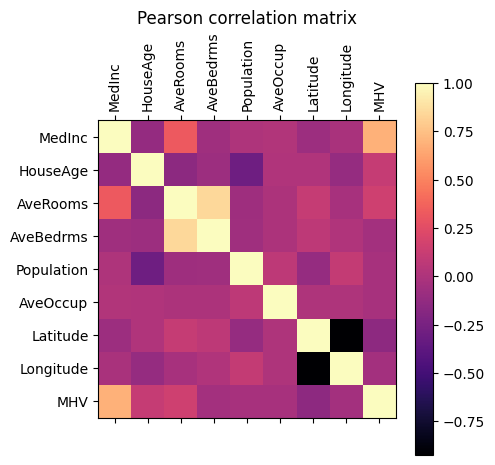

In [105]:
pearson_mat = df.corr() # defaults to pearson correlation
print(abs(pearson_mat))

plt.matshow(pearson_mat, cmap='magma')
plt.xticks(np.arange(0, len(pearson_mat)), labels=df.keys, rotation='vertical')
plt.yticks(np.arange(0, len(pearson_mat)), labels=df.keys)
plt.title('Pearson correlation matrix')
plt.colorbar(cmap='magma')
plt.show()


**Question: Which feature has the highest (abs) correlation with the variable we want to predict? What does it say about the relation of those two variables?**

The feature with the highest absolute correlation with the Median House Value feature is the Median Income. This is expected, as the value of a house in a block grows proportional to the income of the people who live in there. <br>
Clearly the people who live in more expensive houses are the ones who can afford it. This, however can not be as easily affirmated the other way, the people who have a higher median income not necessarily live in a more expensive house, they may choose to live in a cheaper one.

### Create train and test data

- In order to evaluate the performance of the linear regressor, you’ll have to split the data into training and test data. Use the **train_test_split()** method from scikit-learn in order to get the X_train, X_test, y_train and y_test subsets. You’ll have to set the method’s train_size parameter for determining the percentage of data to be used for training the model and how many data to be left for testing the model. Set the amount of training data on 80%.

- Set the **random_state** parameter of **train test split()** method to **777** in order to assure that the data is always divided in the same way. Otherwise, your results will differ each time you start the script (and therefore not fit with the sample solution for this exercise).

- Make sure the X variable has the following shape: (n_rows,n_cols), n_cols will be equal to 1 at the moment.

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.keys[:-1]], df['MHV'], train_size=0.8, random_state=777)

In [107]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

assert X_train.shape == (16512, 8), "Shape of X_train is wrong."
assert X_test.shape == (4128, 8), "Shape of X_test is wrong."
assert y_train.shape == (16512,), "Shape of y_train is wrong."
assert y_test.shape == (4128,), "Shape of y_test is wrong."

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


### Data normalization
- Data normalization is very important for a lot of machine learning models

- Read: https://en.wikipedia.org/wiki/Feature_scaling
- Summarized: bring all features on the same scale: 
    - otherwise some machine learning classifier based on euclidean distances will not work properly (the distance will be dominated by the feature with the most extreme values) 
    - otherwise the convergence of gradient descent algorithms (used for minimizing the cost function J) will take much longer to converge.

- Normalise your training and test data features with the following formula: 

    $x' = \frac{x - x_{mean}}{ \sigma}$

    - **Attention: Use the mean and standard deviation calculated on your train set to normalise your test set!**

In [111]:
avg = X_train.mean(axis=0)
stdev = X_train.std(axis=0)

X_train = (X_train - avg) / stdev
X_test = (X_test - avg) / stdev


In [112]:
assert round(X_train.mean(axis=0).mean()) == 0, "The mean of your X_train features is not 0, check that you normalized correctly!"
assert round(X_train.std(axis=0).mean()) == 1, "The std of your X_train features is not 1, check that you normalized correctly!"


**Question: What is the reason that we asked you to use the mean and standard deviation from the train set to normalise the test set?**

The main three reasons for this are: <br>
1. The train dataset is much bigger, and thus will be more representative of the mean of the data.
2. We want the model to learn from the training data and use this information on the test data, if we affect both datasets in different ways it will lose accuracy and will not
be a reliable representation of the full picture. <br>
3. The test data is something the model does not know, and normalizing it with the test mean and std means the prediction may be overfitted as it now is processed to its specific values.

## Univariate linear regression
- First we will use our customGDRegressor model made above to do univariate linear regression. As the name "univariate regression" says, we will only use one feature to predict the target variable.

- We will use the MedInc feature as this one has the highest correlation with our target variable.

In [132]:
X_train_single_feature = X_train[['MedInc']].values
X_test_single_feature = X_test[['MedInc']].values

- As in the first exercise, use the customGDRegressor to apply univariate linear regression. This time, train the linear regressor single feature dataset created above.
- Again play with the **n_iter** and **learning_rate** to achieve an **MSE value lower than 0.8**. 
- Store the obtained values for b0 and b1 in **variables called b0 and b1 respectively**.

In [144]:
y_pred_single_feature = customGDRegressor(500, 0.01 )
y_pred_single_feature.fit(X_train_single_feature, y_train)

b0 = y_pred_single_feature.b0
b1 = y_pred_single_feature.b1
print(f"\nb0: {b0}")
print(f"b1: {b1}")

C:\Users\cesar\AppData\Local\Temp\ipykernel_15960\2128987407.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cost = 1/(m) * np.sum(((h - y[:, np.newaxis])**2))


Iteration 0/500, MSE : 5.422837676715431
Iteration 50/500, MSE : 1.325467001866059
Iteration 100/500, MSE : 0.7820667398330047
Iteration 150/500, MSE : 0.7100000734943025
Iteration 200/500, MSE : 0.7004424697000712
Iteration 250/500, MSE : 0.6991749240359382
Iteration 300/500, MSE : 0.6990068199747064
Iteration 350/500, MSE : 0.6989845257282338
Iteration 400/500, MSE : 0.6989815690273484
Iteration 450/500, MSE : 0.6989811769046476
Iteration 499/500, MSE : 0.6989811252285232

b0: 2.067629371071174
b1: 0.8019831938786236


In [145]:
assert b0, "b0 is 0, are you sure you stored the model parameter to a variable called b0?"
assert b1, "b1 is 0, are you sure you stored the model parameter to a variable called b1?"

### Plot the data and draw the regression line

> Use a scatter plot to plot the **train** data

> Plot the line the customGDRegressor has found

> The line should fit the data.

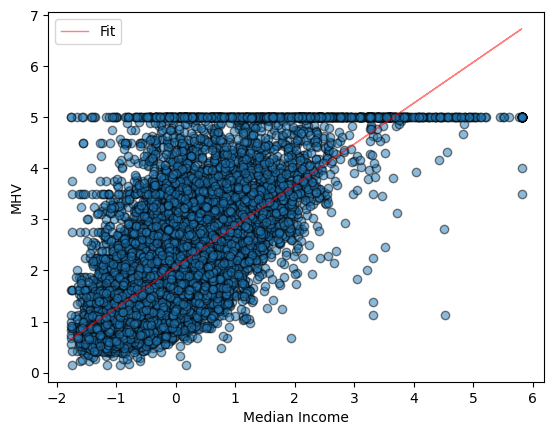

In [146]:
pred_line = b0 + b1 * X_train_single_feature
plt.scatter(X_train_single_feature, y_train, alpha=0.5, edgecolors='k')
plt.plot(X_train_single_feature, pred_line, 'r', linewidth=1, alpha=0.5, label="Fit")
plt.legend()
plt.xlabel("Median Income")
plt.ylabel("MHV")
plt.show()

**Question: Describe what you find in the plot. Describe how the feature behaves and it relation with the target variable**

The model seems to be correctly fitted to the data, with the model line following the tendency of it. However, as the data is not linear and is capped at a value for MHV of 5, a linear regression will never achieve a perfect fit here.

### Testing the model
Now that we have trained our model and visually checked that the obtained line fits our data it's time to evaluate the performance of our model on new unseen data. 
- Predict y_test from X_test_single_feature with our trained model.
- Evaluate the performance of our model on the test set by calculating the MSE.

In [147]:
from sklearn.metrics import mean_squared_error

y_pred_test = y_pred_single_feature.predict(X_test_single_feature)
y_pred_train = y_pred_single_feature.predict(X_train_single_feature)
mse = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"The MSE is: {mse}")
print(f"The MSE for the train data is: {mse_train}")

The MSE is: 0.709787006250209
The MSE for the train data is: 0.6989811252285232


In [148]:
assert mse<1, "You should be able to achieve an MSE bellow 1"


#### Question: Compare the MSE values you obtained on the test and train set. Does the model perform better or worse on the test set, explain why?
YOUR ANSWER HERE

#### Question: Play around with the learning rate, what happens when it gets too high or too low? Explain why this happens?
YOUR ANSWER HERE

In [ ]:
#This cell is intended to draw you attention to the previous two0 cell's questions.
dummy_var = False
assert dummy_var, "Do not forget to answer the previous' two cell question, once you have done that set dummy_var to True to continue"

## Multivariate linear regression
> All features from the dataset will now be used. As our customGDRegressor will not work with multiple features, the **SGDRegressor** from sklearn can be used. 


### Fit the Linear Regression model

- Fit a [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) model on the X_train and y_train data.

- To obtain comparable results set the random_state feature of the SGDRegressor to 10.

- Test the fitted model on the X_test and y_test data.
- You should obain an MSE lower than 0.7 on your test set.


- Try different combinations of input features to predict the house price.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Fit the model on the train set
mse_train = None
mse_test = None
random_state = 10

# YOUR CODE HERE
raise NotImplementedError()


In [ ]:

print(f"MSE - train: {mse_train}")
print(f"MSE -  test: {mse_test}")


**Question: Do you need all the features to achieve a good prediction performance and why?**
YOUR ANSWER HERE

In [ ]:
#This cell is intended to draw you attention to the previous cell's questions.
dummy_var = False
assert dummy_var, "Do not forget to answer the previous' cell question, once you have done that set dummy_var to True to continue"

### Feature subset selection
- Try to find a subset of **maximum 3 features**, that achieves an MSE lower than 0.67.
- Add the features you used to the **features** array.

In [ ]:
# Fit the model on the train set
mse_train = None
mse_test = None
random_state= 10
# Array with feature names you used
features = []

# YOUR CODE HERE
raise NotImplementedError()
print(f"MSE - train: {mse_train}")
print(f"MSE -  test: {mse_test}")

In [ ]:
assert mse_train < 0.67, f"The MSE is higher than 30!"
assert mse_test < 0.67, f"The MSE is higher than 30!"
assert len(features) <= 3, f"You used more than 3 features!"

**Question: How did you find the subset of 3 features, explain your reasoning/procedure?**

YOUR ANSWER HERE

In [ ]:
#This cell is intended to draw you attention to the previous cell's questions.
dummy_var = False
assert dummy_var, "Do not forget to answer the previous' cell question, once you have done that set dummy_var to True to continue"

**Question: Can you give an estimate of the time you spent on this part of the lab (number of hours)? You can also write down any other feedback you have about this lab, thanks!**

YOUR ANSWER HERE

In [ ]:
#This cell is intended to draw you attention to the previous cell's questions.
dummy_var = False
assert dummy_var, "Do not forget this last answer as it helps us improve the course material"